# EDA

## Libraries and data import

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Lectura de archivos
df_steamgames=pd.read_csv('Datos_procesados/df_steamgames.csv')
df_users=pd.read_csv('Datos_procesados/df_users.csv')
df_user_reviews=pd.read_csv('Datos_procesados/df_user_reviews.csv')

## Steamgames

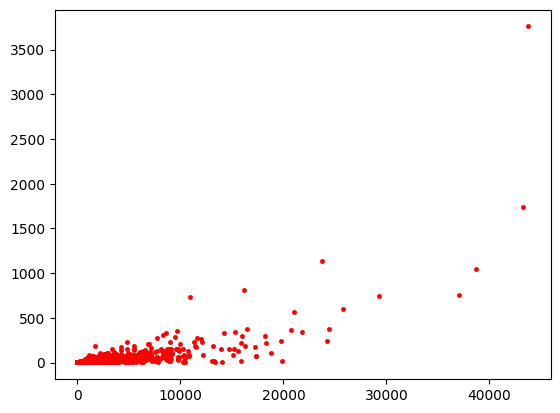

In [3]:
#relacion entre reviews y cantidad de jugadores

plt.scatter( df_steamgames['players'], df_steamgames['total_reviews'], color='red', marker='.', linewidth=0.5)

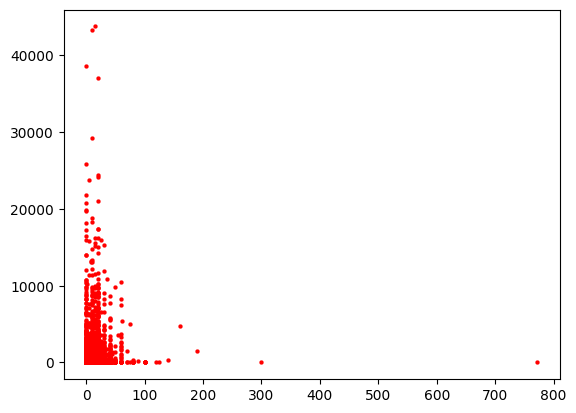

In [4]:
#relacion entre precio y cantidad de jugadores

plt.scatter(df_steamgames['price'], df_steamgames['players'], color='red', marker='.', linewidth=0.1)

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 9.000e+00,
        7.000e+00, 1.000e+01, 1.200e+01, 1.600e+01, 1.500e+01, 3.400e+01,
        3.600e+01, 3.300e+01, 3.900e+01, 4.200e+01, 6.100e+01, 5.500e+01,
        4.000e+01, 6.900e+01, 5.000e+01, 8.400e+01, 7.900e+01, 1.020e+02,
        1.550e+02, 1.670e+02, 2.130e+02, 3.370e+02, 4.360e+02, 5.890e+02,
        1.192e+03, 1.551e+03, 2.832e+03, 4.945e+03, 6.933e+03, 9.517e+03,
        9.600e+01, 3.000e+00, 1.000e+00]),
 array([1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
        1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
        1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        20

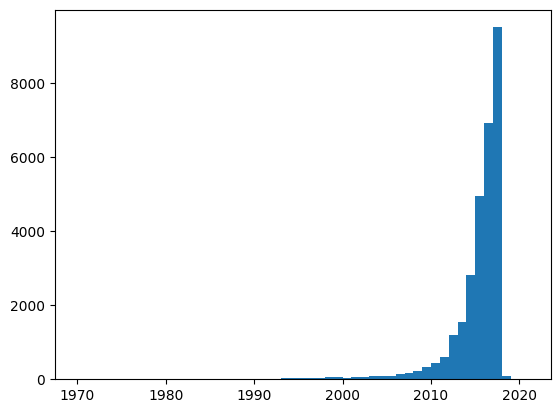

In [5]:
#juegos por año de lanzamiento
bines=max(df_steamgames['release_year'][df_steamgames['release_year']!=0].unique()) - min(df_steamgames['release_year'][df_steamgames['release_year']!=0].unique())
plt.hist(df_steamgames['release_year'][df_steamgames['release_year']!=0], bins=bines)

### Análisis de rentabilidad

#### Agregar columna de revenue del juego

In [6]:
df_steamgames['players'].fillna(0, inplace=True)
df_steamgames['price'].fillna(0, inplace=True)
df_steamgames['revenue'] = df_steamgames['price'] * df_steamgames['players']

C:\Users\feder\AppData\Local\Temp\ipykernel_4940\1725960570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_steamgames['players'].fillna(0, inplace=True)
C:\Users\feder\AppData\Local\Temp\ipykernel_4940\1725960570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

#### Facturación por juego

In [7]:
df_total_revenues=df_steamgames[['item_id', 'item_title','revenue' ]].sort_values('revenue', ascending= False)
df_total_revenues = df_total_revenues[df_total_revenues['revenue'] != 0]
df_total_revenues.reset_index(inplace=True)
df_total_revenues.drop('index', axis=1, inplace=True)

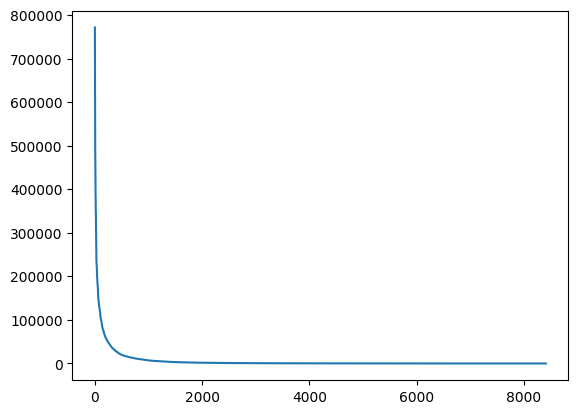

In [8]:
plt.plot(df_total_revenues['revenue'])

In [9]:
#juegos con facturación menor a 100 dólares
df_total_revenues[df_total_revenues['revenue'] < 100].count()

item_id       2823
item_title    2823
revenue       2823
dtype: int64

In [10]:
#facturación total por venta de juegos
df_total_revenues['revenue'].sum()

53801007.03000001

In [12]:
#Top 10 de juegos por facturación
df_total_revenues.head(10)

,item_id,item_title,revenue
0,211500,RaceRoom Racing Experience,771241.63
1,550,Left 4 Dead 2,740509.56
2,730,Counter-Strike: Global Offensive,656202.24
3,407530,ARK: Survival Of The Fittest,629475.07
4,346110,ARK: Survival Evolved,497077.14
5,224580,Arma II: DayZ Mod,490151.95
6,620,Portal 2,489055.35
7,240,Counter-Strike: Source,484157.80
8,8930,Sid Meier's Civilization® V,458936.97
9,202970,Call of Duty®: Black Ops II,451364.76


### Análisis por género

In [13]:
#se seleccionan los géneros
genres=df_steamgames.columns.tolist()
columnasasacar=['item_id', 'item_title',
 'price', 'playtime_forever',
 'mean_recommend',
 'mean_sentiment_analysis',
 'total_reviews',
 'players', 'release_year', 'revenue']

for i in columnasasacar:
    genres.remove(i)

In [14]:
#se genera un dataframe para el analisis estadístico por género
df_genres_statistics=pd.DataFrame(genres)
df_genres_statistics.rename(columns={0:'genre'}, inplace=True)

In [15]:
#se generan sus columnas
df_genres_statistics['games']=pd.Series()
df_genres_statistics['playtime_forever']=pd.Series()
df_genres_statistics['mean_recommend']=pd.Series()
df_genres_statistics['mean_sentiment_analysis']=pd.Series()
df_genres_statistics['total_reviews']=pd.Series()
df_genres_statistics['total_revenues']=pd.Series()

In [16]:
#se le da el valor a cada columna
for index, row in df_genres_statistics.iterrows():
    i=row['genre']
    df_genres_statistics.at[index,'games']=df_steamgames[df_steamgames[i]==1]['item_id'].count()
    df_genres_statistics.at[index,'playtime_forever']=df_steamgames[df_steamgames[i]==1]['playtime_forever'].sum()
    df_genres_statistics.at[index,'mean_recommend']=df_steamgames[df_steamgames[i]==1]['mean_recommend'].mean()
    df_genres_statistics.at[index,'mean_sentiment_analysis']=df_steamgames[df_steamgames[i]==1]['mean_sentiment_analysis'].mean()
    df_genres_statistics.at[index,'total_reviews']=df_steamgames[df_steamgames[i]==1]['total_reviews'].sum()
    df_genres_statistics.at[index,'players']=df_steamgames[df_steamgames[i]==1]['players'].sum()
    df_genres_statistics.at[index,'total_revenues']=df_steamgames[df_steamgames[i]==1]['revenue'].sum()
    


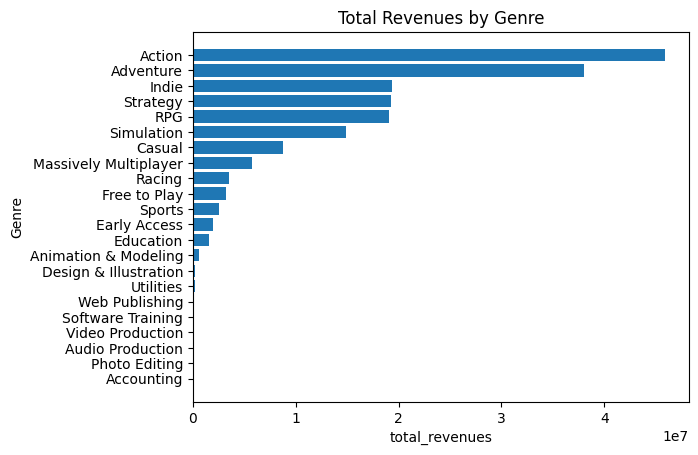

In [20]:
# Facturación por género
# primero se reordena el dataframe
df_genres_statistics_sorted = df_genres_statistics.sort_values(by='total_revenues', ascending=True)

# Graficar
plt.barh(df_genres_statistics_sorted['genre'], df_genres_statistics_sorted['total_revenues'])
plt.xlabel('total_revenues')
plt.ylabel('Genre')
plt.title('Total Revenues by Genre')
#guardamos la imagen para su uso en el readme
plt.savefig('Datos_procesados/Imagenes/RevenuesbyGenre.png')
#mostramos la figura
plt.show()

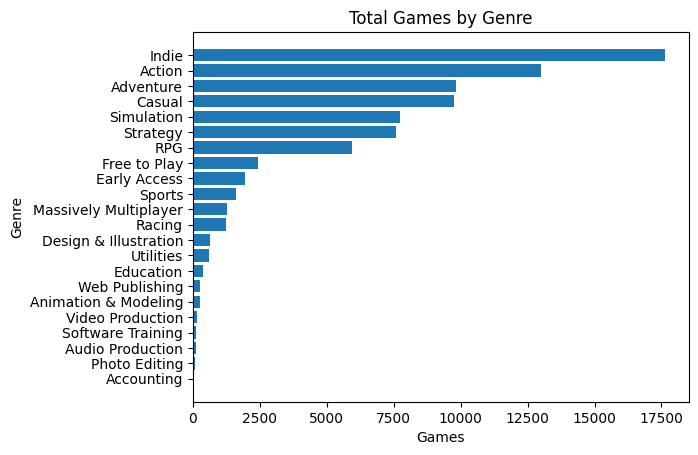

In [22]:
# Juegos por género
# primero se reordena el dataframe
df_genres_statistics_sorted = df_genres_statistics.sort_values(by='games', ascending=True)

# Graficar
plt.barh(df_genres_statistics_sorted['genre'], df_genres_statistics_sorted['games'])
plt.xlabel('Games')
plt.ylabel('Genre')
plt.title('Total Games by Genre')
#guardamos la imagen para su uso en el readme
plt.savefig('Datos_procesados/Imagenes/GamesbyGenre.png')
#mostramos la figura
plt.show()

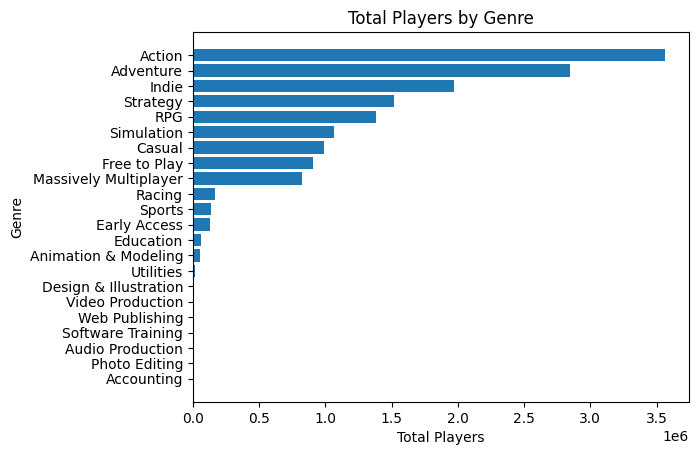

In [23]:
# Jugadores por género
# primero se reordena el dataframe
df_genres_statistics_sorted = df_genres_statistics.sort_values(by='players', ascending=True)

# Graficar
plt.barh(df_genres_statistics_sorted['genre'], df_genres_statistics_sorted['players'])
plt.xlabel('Total Players')
plt.ylabel('Genre')
plt.title('Total Players by Genre')
#guardamos la imagen para su uso en el readme
plt.savefig('Datos_procesados/Imagenes/PlayersbyGenre.png')
#mostramos la figura
plt.show()

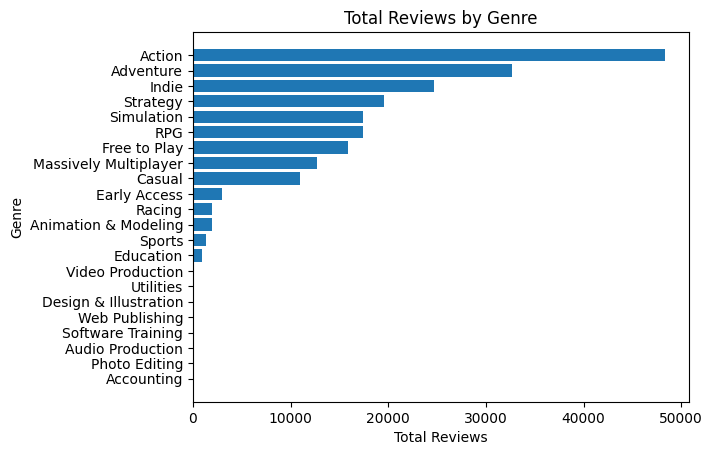

In [24]:
#reviews por género
# primero se reordena el dataframe
df_genres_statistics_sorted = df_genres_statistics.sort_values(by='total_reviews', ascending=True)

# Graficar
plt.barh(df_genres_statistics_sorted['genre'], df_genres_statistics_sorted['total_reviews'])
plt.xlabel('Total Reviews')
plt.ylabel('Genre')
plt.title('Total Reviews by Genre')
plt.show()

## Users

(array([6.3244e+04, 5.6400e+03, 1.2210e+03, 3.8000e+02, 1.6400e+02,
        9.2000e+01, 4.3000e+01, 2.4000e+01, 2.5000e+01, 1.2000e+01,
        1.4000e+01, 9.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.56240e+02, 3.11480e+02, 4.66720e+02, 6.21960e+02,
        7.77200e+02, 9.32440e+02, 1.08768e+03, 1.24292e+03, 1.39816e+03,
        1.55340e+03, 1.70864e+03, 1.86388e+03, 2.01912e+03, 2.17436e+03,
        2.32960e+03, 2.48484e+03, 2.64008e+03, 2.79532e+03, 2.95056e+03,
        3.10580e+03, 3.261

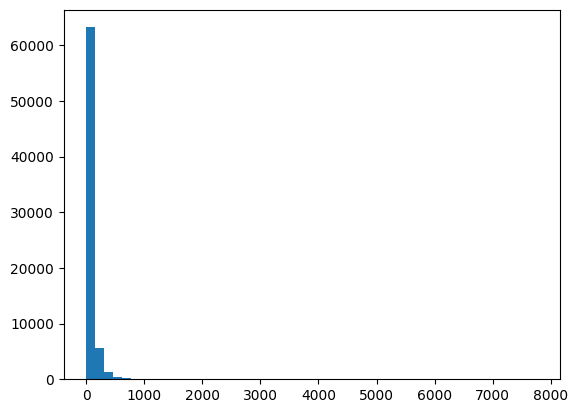

In [25]:
#cantidad de juegos por jugador
plt.hist(df_users['items'], bins=50)

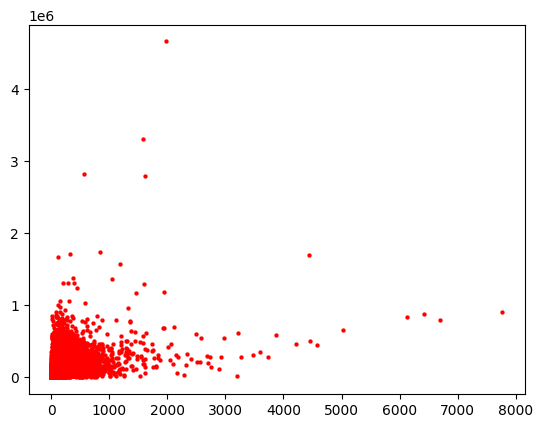

In [26]:
#tiempo jugado por juego
plt.scatter(df_users['items'], df_users['playtime_forever'], color='red', marker='.', linewidth=0.1)

(array([1.1844e+04, 4.2170e+03, 2.2210e+03, 1.3390e+03, 8.5300e+02,
        6.8500e+02, 4.9600e+02, 3.9700e+02, 2.9600e+02, 2.5100e+02,
        0.0000e+00, 9.0000e+00, 0.0000e+00, 1.1000e+01, 1.0000e+00,
        5.0000e+00, 0.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 19 artists>)

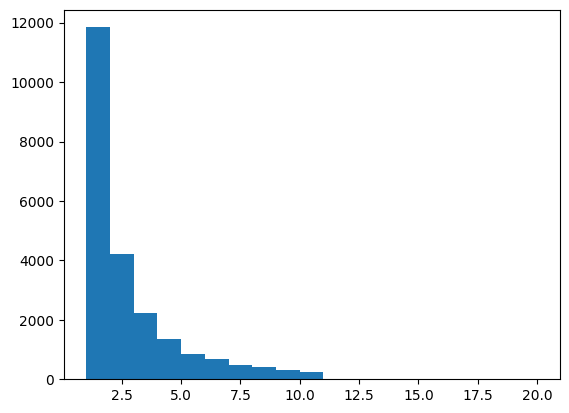

In [27]:
#reviews por jugador
plt.hist(df_users['total_reviews'], bins=19)

## User reviews

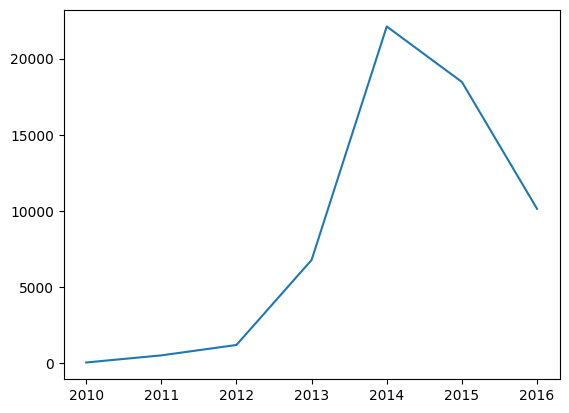

In [28]:
#reviews por año
#agrupamos los valores por año
a=df_user_reviews['year'].value_counts().sort_index(ascending=True)
#los graficamos
plt.plot(a.index, a.values)
#guardamos la imagen para su uso en el readme
plt.savefig('Datos_procesados/Imagenes/ReviewsbyYear.png')